### MFC vs MFCC visualization difference

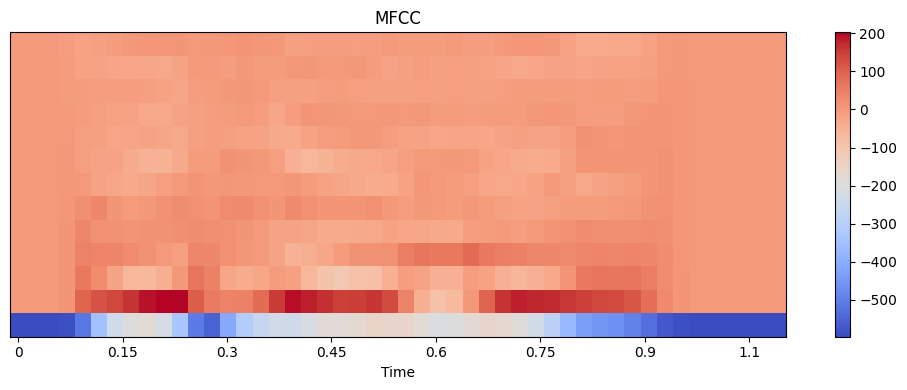

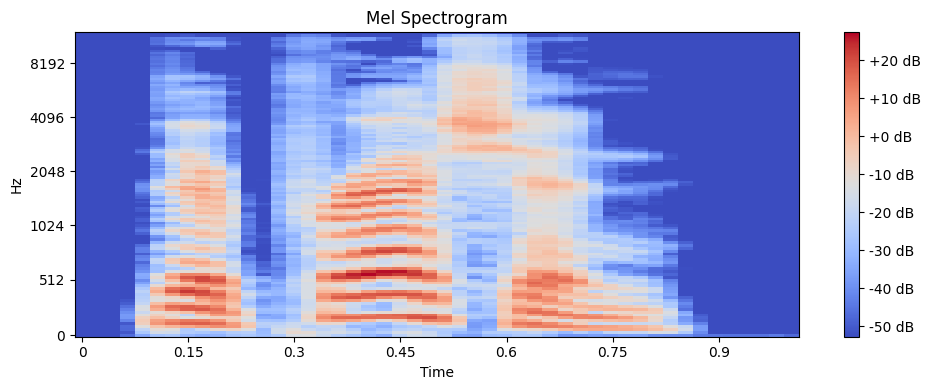

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_path = 'depression_test.mp3'
y, sr = librosa.load(audio_path, sr=None)  # sr (sample rate) None uses the original SR of the file

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust n_mfcc depending on your requirements

# Plotting the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


# -------------------------------


# Get Mel spectrogram
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to log scale (dB)
log_mel_spect = librosa.power_to_db(mel_spect)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spect, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('MCC - ')
plt.tight_layout()
plt.show()

In [27]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [28]:
def extract_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(
        y=y,
        sr=sr,
        n_mfcc=40,  # 40 MFCC features
        hop_length=int(sr * 0.010),  # 10ms stride
        n_fft=int(sr * 0.025)  # 25ms window
    )
    
    # Extract MCCs (Mel Cepstral Coefficients)
    # First get mel spectrogram
    mel_spect = librosa.feature.melspectrogram(
        y=y, 
        sr=sr, 
        n_mels=40,
        fmin=0,
        fmax=sr/2  # Nyquist frequency
    )
    # Convert to log scale (this is our MCC representation)
    mccs = librosa.power_to_db(mel_spect)
    
    # Get frequency bins for mel spectrogram
    mel_freqs = librosa.mel_frequencies(n_mels=40, fmin=0, fmax=sr/2)
    
    return mfccs, mccs, sr, mel_freqs

def plot_comparison(audio_path):
    # Get features
    mfccs, mccs, sr, mel_freqs = extract_features(audio_path)
    
    # Create subplot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
    
    # Plot MFCC
    img1 = librosa.display.specshow(mfccs, ax=ax1, cmap='viridis',
                                  y_axis='mel')  # Add mel scale to y-axis
    ax1.set_title('Mel-Frequency Cepstral Coefficients (MFCC)')
    fig.colorbar(img1, ax=ax1, label='Magnitude')
    ax1.set_ylabel('Mel Bands')
    ax1.set_xlabel('Time (s)')
    
    # Plot MCC with actual frequency ticks
    img2 = librosa.display.specshow(mccs, ax=ax2, cmap='viridis',
                                  sr=sr,
                                  y_axis='mel')
    ax2.set_title('Mel Cepstral Coefficients (MCC)')
    fig.colorbar(img2, ax=ax2, format='%+2.0f dB')
    
    # Create frequency tick positions and labels
    # Select a subset of frequencies for readable ticks
    n_ticks = 5
    tick_indices = np.linspace(0, len(mel_freqs)-1, n_ticks, dtype=int)
    tick_freqs = mel_freqs[tick_indices]
    
    # Convert to kHz for frequencies above 1000 Hz
    tick_labels = [f'{int(f)}' if f < 1000 else f'{f/1000:.1f}k' 
                  for f in tick_freqs]
    
    # ax2.set_yticks(tick_indices)
    # ax2.set_yticklabels(tick_labels)
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_xlabel('Time (s)')
    
    plt.tight_layout()
    plt.savefig('latex/vis_pdf/mfcc_mcc_comparison.pdf')
    plt.show()

    return mfccs, mccs, sr


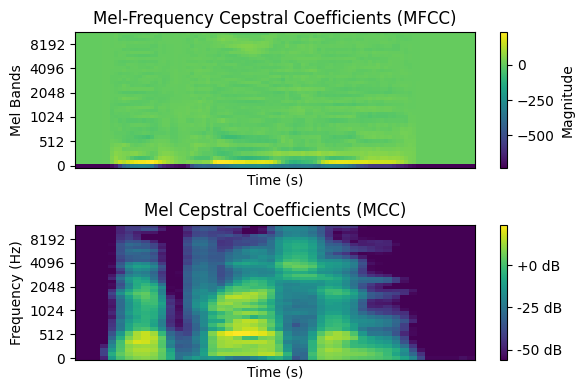

In [29]:
audio_path = 'depression_test.mp3'
mfccs, mccs, sr = plot_comparison(audio_path)